In [1]:
import tensorflow as tf

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.12.0


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [4]:
import os
os.listdir('MNIST/')

['t10k-images-idx3-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 'train-images-idx3-ubyte.gz',
 'train-labels-idx1-ubyte.gz']

In [5]:
print('Image Inventory')
print('---------------')
print('Training: ' + str(len(data.train.labels)))
print('Testing: ' + str(len(data.test.labels)))
print('---------------')

Image Inventory
---------------
Training: 55000
Testing: 10000
---------------


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-------------------
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


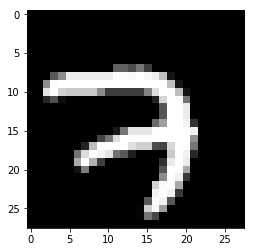

-------------------
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


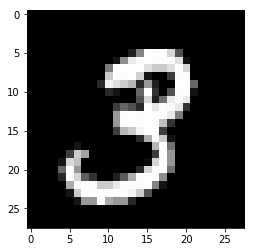

-------------------
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


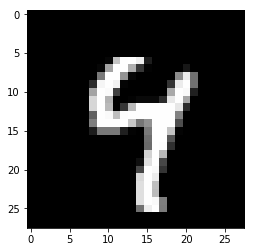

-------------------
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


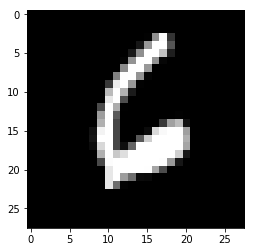

In [11]:
for i in range(4):
    image = data.train.images[i]
    image = np.array(image, dtype = 'float')
    label = data.train.labels[i]
    pixels = image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    print('-------------------')
    print(label)
    plt.show()

In [12]:
from matplotlib import image

In [14]:
if not os.path.exists('MNIST/images'):
    os.mkdir('MNIST/images/')
os.chdir('MNIST/images')

In [16]:
for i in range(1,10):
    png = data.train.images[i]
    png = np.array(png, dtype = 'float')
    pixels = png.reshape((28,28))
    image.imsave("image_no_{}.png".format(i),pixels, cmap='gray')

In [17]:
print(os.listdir())

['image_no_1.png', 'image_no_2.png', 'image_no_3.png', 'image_no_4.png', 'image_no_5.png', 'image_no_6.png', 'image_no_7.png', 'image_no_8.png', 'image_no_9.png']


In [19]:
from Augmentor import Pipeline

In [20]:
augmentor = Pipeline('D:\spark study\MNIST\images')

Initialised with 9 image(s) found.
Output directory set to D:\spark study\MNIST\images\output.

In [21]:
augmentor.rotate(probability=0.9, max_left_rotation=25, max_right_rotation=25)

In [22]:
for i in range(1,3):
    augmentor.sample(10)

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C4DD412828>: 100%|█| 10/10 [00:00<00:00, 640.16 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x1C4DD412080>: 100%|█| 10/10 [00:00<00:00, 406.49 Samples/s]               


In [23]:
xtrain = data.train.images
ytrain = np.asarray(data.train.labels)
xtest = data.test.images
ytest = np.asarray(data.test.labels)

In [25]:
xtrain = xtrain.reshape(xtrain.shape[0],28,28,1)
xtest = xtest.reshape(xtest.shape[0],28,28,1)
ytrain = ytrain.reshape(ytrain.shape[0],10)
ytest = ytest.reshape(ytest.shape[0],10)

In [27]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(55000, 28, 28, 1)
(55000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [29]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

In [30]:
K.set_image_dim_ordering('tf')

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(xtrain,ytrain,batch_size = 1024, epochs = 10, validation_data = (xtest,ytest))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - ETA: 53s - loss: 0.6974 - acc: 0.45 - ETA: 38s - loss: 0.5732 - acc: 0.67 - ETA: 31s - loss: 0.4952 - acc: 0.75 - ETA: 28s - loss: 0.4469 - acc: 0.78 - ETA: 26s - loss: 0.4173 - acc: 0.81 - ETA: 24s - loss: 0.3955 - acc: 0.82 - ETA: 23s - loss: 0.3756 - acc: 0.83 - ETA: 22s - loss: 0.3582 - acc: 0.84 - ETA: 21s - loss: 0.3413 - acc: 0.85 - ETA: 20s - loss: 0.3253 - acc: 0.86 - ETA: 20s - loss: 0.3112 - acc: 0.86 - ETA: 19s - loss: 0.2989 - acc: 0.87 - ETA: 19s - loss: 0.2881 - acc: 0.88 - ETA: 18s - loss: 0.2785 - acc: 0.88 - ETA: 17s - loss: 0.2698 - acc: 0.89 - ETA: 17s - loss: 0.2612 - acc: 0.89 - ETA: 16s - loss: 0.2537 - acc: 0.89 - ETA: 16s - loss: 0.2463 - acc: 0.90 - ETA: 15s - loss: 0.2396 - acc: 0.90 - ETA: 14s - loss: 0.2331 - acc: 0.90 - ETA: 14s - loss: 0.2269 - acc: 0.91 - ETA: 13s - loss: 0.2213 - acc: 0.91 - ETA: 13s - loss: 0.2160 - acc: 0.91 - ETA: 12s - loss: 0

55000/55000 [==============================] - ETA: 24s - loss: 0.0329 - acc: 0.99 - ETA: 24s - loss: 0.0320 - acc: 0.99 - ETA: 24s - loss: 0.0304 - acc: 0.99 - ETA: 24s - loss: 0.0304 - acc: 0.99 - ETA: 23s - loss: 0.0303 - acc: 0.99 - ETA: 22s - loss: 0.0305 - acc: 0.99 - ETA: 21s - loss: 0.0308 - acc: 0.99 - ETA: 21s - loss: 0.0303 - acc: 0.99 - ETA: 20s - loss: 0.0296 - acc: 0.99 - ETA: 19s - loss: 0.0293 - acc: 0.99 - ETA: 19s - loss: 0.0291 - acc: 0.99 - ETA: 18s - loss: 0.0288 - acc: 0.99 - ETA: 18s - loss: 0.0285 - acc: 0.99 - ETA: 17s - loss: 0.0282 - acc: 0.99 - ETA: 17s - loss: 0.0281 - acc: 0.99 - ETA: 16s - loss: 0.0280 - acc: 0.99 - ETA: 16s - loss: 0.0279 - acc: 0.99 - ETA: 15s - loss: 0.0278 - acc: 0.99 - ETA: 15s - loss: 0.0277 - acc: 0.99 - ETA: 15s - loss: 0.0273 - acc: 0.99 - ETA: 14s - loss: 0.0271 - acc: 0.99 - ETA: 14s - loss: 0.0269 - acc: 0.99 - ETA: 13s - loss: 0.0268 - acc: 0.99 - ETA: 13s - loss: 0.0268 - acc: 0.99 - ETA: 12s - loss: 0.0267 - acc: 0.99 - ETA

55000/55000 [==============================] - ETA: 22s - loss: 0.0156 - acc: 0.99 - ETA: 22s - loss: 0.0134 - acc: 0.99 - ETA: 22s - loss: 0.0143 - acc: 0.99 - ETA: 21s - loss: 0.0145 - acc: 0.99 - ETA: 21s - loss: 0.0143 - acc: 0.99 - ETA: 20s - loss: 0.0145 - acc: 0.99 - ETA: 20s - loss: 0.0144 - acc: 0.99 - ETA: 19s - loss: 0.0141 - acc: 0.99 - ETA: 19s - loss: 0.0140 - acc: 0.99 - ETA: 19s - loss: 0.0140 - acc: 0.99 - ETA: 18s - loss: 0.0141 - acc: 0.99 - ETA: 18s - loss: 0.0144 - acc: 0.99 - ETA: 18s - loss: 0.0145 - acc: 0.99 - ETA: 17s - loss: 0.0144 - acc: 0.99 - ETA: 17s - loss: 0.0146 - acc: 0.99 - ETA: 16s - loss: 0.0145 - acc: 0.99 - ETA: 16s - loss: 0.0146 - acc: 0.99 - ETA: 15s - loss: 0.0147 - acc: 0.99 - ETA: 15s - loss: 0.0146 - acc: 0.99 - ETA: 15s - loss: 0.0147 - acc: 0.99 - ETA: 14s - loss: 0.0146 - acc: 0.99 - ETA: 14s - loss: 0.0145 - acc: 0.99 - ETA: 13s - loss: 0.0147 - acc: 0.99 - ETA: 13s - loss: 0.0147 - acc: 0.99 - ETA: 12s - loss: 0.0147 - acc: 0.99 - ETA

55000/55000 [==============================] - ETA: 23s - loss: 0.0092 - acc: 0.99 - ETA: 23s - loss: 0.0081 - acc: 0.99 - ETA: 22s - loss: 0.0077 - acc: 0.99 - ETA: 21s - loss: 0.0087 - acc: 0.99 - ETA: 21s - loss: 0.0093 - acc: 0.99 - ETA: 20s - loss: 0.0094 - acc: 0.99 - ETA: 20s - loss: 0.0094 - acc: 0.99 - ETA: 19s - loss: 0.0094 - acc: 0.99 - ETA: 19s - loss: 0.0093 - acc: 0.99 - ETA: 19s - loss: 0.0091 - acc: 0.99 - ETA: 18s - loss: 0.0092 - acc: 0.99 - ETA: 18s - loss: 0.0092 - acc: 0.99 - ETA: 18s - loss: 0.0091 - acc: 0.99 - ETA: 17s - loss: 0.0092 - acc: 0.99 - ETA: 17s - loss: 0.0092 - acc: 0.99 - ETA: 17s - loss: 0.0091 - acc: 0.99 - ETA: 16s - loss: 0.0092 - acc: 0.99 - ETA: 16s - loss: 0.0094 - acc: 0.99 - ETA: 15s - loss: 0.0093 - acc: 0.99 - ETA: 15s - loss: 0.0095 - acc: 0.99 - ETA: 14s - loss: 0.0096 - acc: 0.99 - ETA: 14s - loss: 0.0095 - acc: 0.99 - ETA: 13s - loss: 0.0095 - acc: 0.99 - ETA: 13s - loss: 0.0095 - acc: 0.99 - ETA: 12s - loss: 0.0095 - acc: 0.99 - ETA

In [39]:
stats = model.evaluate(xtest,ytest)

10000/10000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 3s 296us/step


In [40]:
print("The accuracy rate is {}%".format(round(stats[1],3)*100))
print("The loss rate is {}%".format(round(stats[0],3)*100))

The accuracy rate is 99.6%
The loss rate is 1.3%


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________
